In [1]:
import h5py
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import math 

In [5]:
file_path = '../results/w_bos_eos.hdf5'

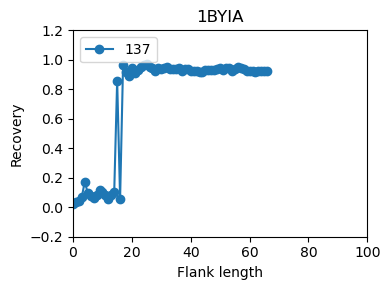

In [11]:
import h5py
import math
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize a dictionary to store sum_mult for each protein, flank_len and position
protein_to_position_to_flank_len_to_values = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Load the hdf5 file
with h5py.File(file_path, 'r') as f:
    protein_name = '1BYIA'
    position = 136
    flank_lens = list(f[f"{protein_name}/{position}"].keys())
    flank_len_values = [int(fl.split('/')[0]) for fl in flank_lens]  # get flank lengths as integers

    # Collect sum_mult for each flank_len and position
    for fl, fl_value in zip(flank_lens, flank_len_values):
        sum_mult = f[f"{protein_name}/{position}/{fl}/norm_sum_mult_value"][()]
        protein_to_position_to_flank_len_to_values[protein_name][position][fl_value].append(sum_mult)


# Calculate the total number of subplots needed
total_subplots = sum([len(positions) for positions in protein_to_position_to_flank_len_to_values.values()])
n_cols = 6
n_rows = math.ceil(total_subplots / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Flatten axs for easy iteration
axs = axs.flatten()

i = 0
for protein_name, position_to_flank_len_to_values in protein_to_position_to_flank_len_to_values.items():
    for position, flank_len_to_values in position_to_flank_len_to_values.items():
        # Prepare data for plotting
        flank_lengths = sorted(flank_len_to_values.keys())
        sum_mult_values = [value for fl in flank_lengths for value in flank_len_to_values[fl]]  # Flatten list

        # Plot the data points connected by lines
        axs[i].plot([fl for fl in flank_lengths for _ in flank_len_to_values[fl]],  # Repeat each normalized flank length for the number of corresponding sum_mult values
                 sum_mult_values, marker='o', label=str(int(position) + 1))

        axs[i].set_title(f"{protein_name}")
        axs[i].set_xlabel('Flank length')
        axs[i].set_ylabel('Recovery')
        axs[i].set_xlim(0, 100)
        axs[i].set_ylim(-0.2, 1.2)
        axs[i].legend(loc='upper left')
        i += 1

# Delete unused subplots
for j in range(i, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
#plt.title(name)
plt.savefig('figures_manuscript/' + protein_name + '_' + str(position) + '_recovery.svg')
plt.show()



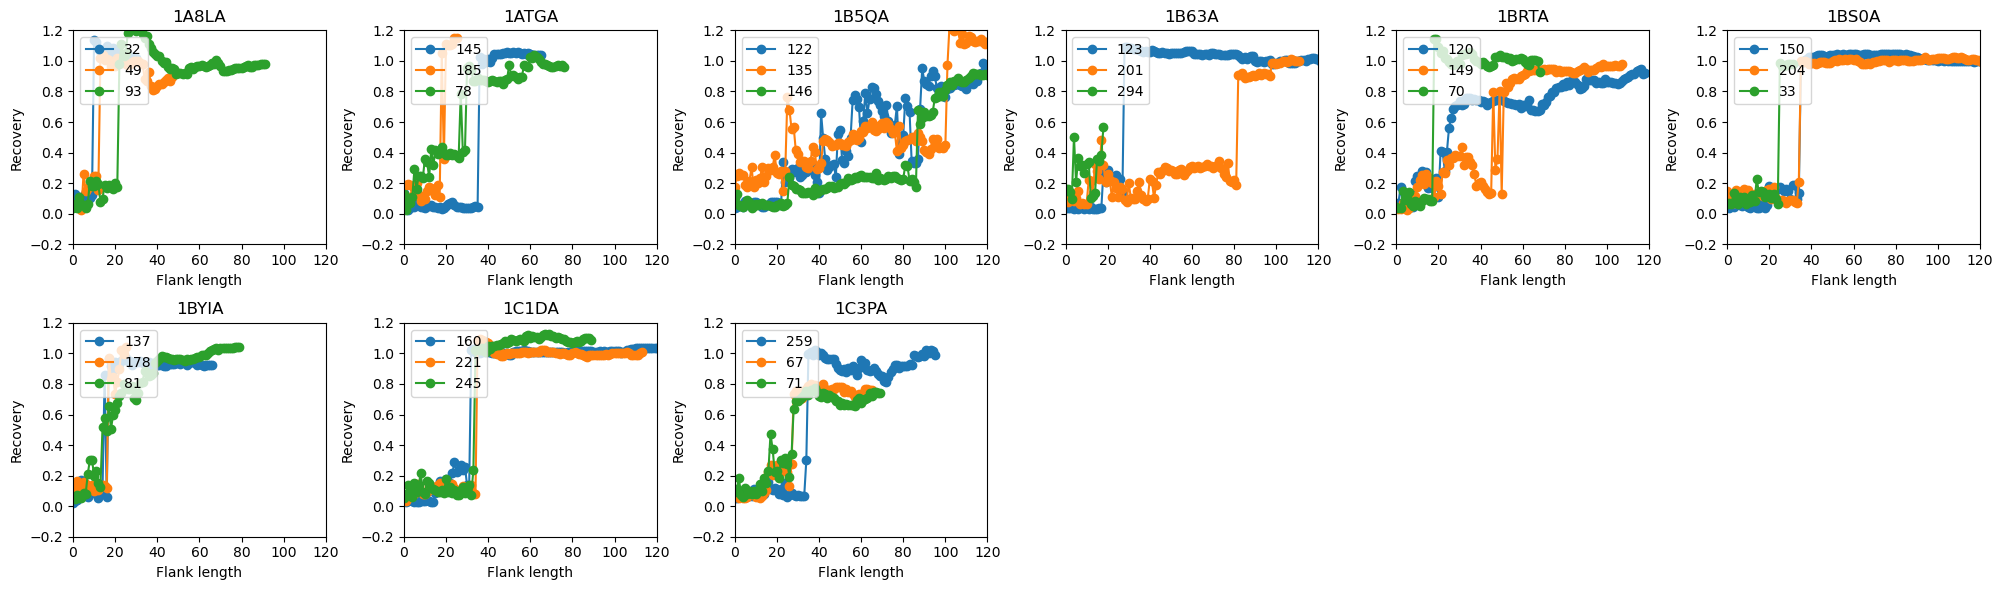

In [9]:
import h5py
import math
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize a dictionary to store sum_mult for each protein, flank_len and position
protein_to_position_to_flank_len_to_values = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Load the hdf5 file
try:
    with h5py.File(file_path, 'r') as f:
        protein_names = list(f.keys())
        protein_names = protein_names[:10]

        for protein_name in protein_names:
            positions = list(f[protein_name].keys())

            for position in positions:
                flank_lens = list(f[f"{protein_name}/{position}"].keys())
                flank_len_values = [int(fl.split('/')[0]) for fl in flank_lens]  # get flank lengths as integers

                # Collect sum_mult for each flank_len and position
                for fl, fl_value in zip(flank_lens, flank_len_values):
                    sum_mult = f[f"{protein_name}/{position}/{fl}/norm_sum_mult_value"][()]
                    protein_to_position_to_flank_len_to_values[protein_name][position][fl_value].append(sum_mult)

except OSError as e:
    print(f"File is already open: {e}")

# Calculate the number of rows needed for the subplots
n = len(protein_to_position_to_flank_len_to_values)
n_cols = 6
n_rows = math.ceil(n / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Flatten axs for easy iteration
axs = axs.flatten()

for i, (protein_name, position_to_flank_len_to_values) in enumerate(protein_to_position_to_flank_len_to_values.items()):
        for position, flank_len_to_values in position_to_flank_len_to_values.items():
            # Prepare data for plotting
            flank_lengths = sorted(flank_len_to_values.keys())
            sum_mult_values = [value for fl in flank_lengths for value in flank_len_to_values[fl]]  # Flatten list

            # Plot the data points connected by lines
            axs[i].plot([fl for fl in flank_lengths for _ in flank_len_to_values[fl]],  # Repeat each normalized flank length for the number of corresponding sum_mult values
                     sum_mult_values, marker='o', label=str(int(position) + 1))

        axs[i].set_title(protein_name)
        axs[i].set_xlabel('Flank length')
        axs[i].set_ylabel('Recovery')
        axs[i].set_xlim(0, 120)
        axs[i].set_ylim(-0.2, 1.2)
        axs[i].legend(loc='upper left')
        
# Delete unused subplots
for j in range(i, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
#plt.title(name)
#plt.savefig(file_path.split('.')[0] + '.jpg')
#plt.savefig(file_path.split('.')[0] + '.svg')
plt.show()
